### Building a model to differentiate between noise and electrons with noise from scratch

In this notebook, we will build a convolutional neural network to classify a signal as electron or noise. Therefore, we are facing a binary classification problem: electron or noise. This is the reason why we will have just one neuron in the output layer with sigmoidal activation.

First we import the data stored in a file called `eVSn_noisy1.npz` composed of two variables: 'data' for the numpy arrays with energy or noise, and 'labels' where 1 stands for electron signal and 0 for noise.
* [Model without noise](#Model-without-noise)
* [First model: 40 epochs](#First-model:-40-epochs)
* [Second model: 60 epochs](#Second-model:-60-epochs)
* [Third model: relu activation](#Third-model:-relu-activation)
* [Fourth model: relu activation, dropout](#Fourth-model:-relu-activation,-dropout)
* [Fifth model: one layer less, dropout](#Fifth-model:-one-layer-less,-dropout)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
loaded = np.load('/Users/Silvia/Desktop/TFM/e_VS_n/eVSn_noisy1.npz')
X = loaded['data']
y = loaded['labels']

In [3]:
#train and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
#standarizing the data
from sklearn import preprocessing

aux_train = X_train.reshape((X_train.shape[0], X_train.shape[1]* X_train.shape[2]))
aux_test = X_test.reshape((X_test.shape[0], X_test.shape[1]* X_test.shape[2]))

scaler = preprocessing.StandardScaler().fit(aux_train)

X_trainr = scaler.transform(aux_train)

X_testr = scaler.transform(aux_test)

print(X_trainr.shape, X_testr.shape)

(3942, 29547) (1314, 29547)


In [5]:
#reshape
X_train = X_trainr.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))

print(X_train.shape)

(3942, 201, 147, 1)


In [6]:
X_test = X_testr.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print(X_test.shape)

(1314, 201, 147, 1)


In [7]:
import keras

Using TensorFlow backend.


### Model without noise

We will load the model (that yielded the highest accuracy) we used to classify between electron and noise:

In [8]:
from keras.models import load_model
 
# load model
model = load_model('model_electron_or_noise_v1.h5')
# summarize model.
model.summary()

# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 199, 145, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 72, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 14, 128)      

The accuracy is high but we will train to improve it:
### First model: 40 epochs

In [9]:
from keras import layers, models, optimizers

In [10]:
window_y, window_x = 201,147

In [12]:
model_n1 = models.Sequential()
model_n1.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_n1.add(layers.MaxPooling2D((2,2)))
model_n1.add(layers.Conv2D(64,(3,3), activation='relu'))
model_n1.add(layers.MaxPooling2D((2,2)))
model_n1.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n1.add(layers.MaxPooling2D((2,2)))
model_n1.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n1.add(layers.MaxPooling2D((2,2)))

model_n1.add(layers.Flatten())
model_n1.add(layers.Dense(units= 2050, activation='softmax'))
model_n1.add(layers.Dense(units= 512, activation='softmax'))
model_n1.add(layers.Dense(units= 1, activation='sigmoid'))
model_n1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 199, 145, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 14, 128)      

In [13]:
model_n1.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [14]:
model_n1.fit(X_train, y_train, epochs= 40, validation_split = 0.2)

Train on 3153 samples, validate on 789 samples
Epoch 1/40
3153/3153 [==============================] - 85s 27ms/step - loss: 0.6932 - acc: 0.5002 - val_loss: 0.6932 - val_acc: 0.4968
Epoch 2/40
3153/3153 [==============================] - 96s 30ms/step - loss: 0.6931 - acc: 0.5046 - val_loss: 0.6930 - val_acc: 0.4968
Epoch 3/40
3153/3153 [==============================] - 85s 27ms/step - loss: 0.6929 - acc: 0.5046 - val_loss: 0.6929 - val_acc: 0.4968
Epoch 4/40
3153/3153 [==============================] - 83s 26ms/step - loss: 0.6928 - acc: 0.5046 - val_loss: 0.6927 - val_acc: 0.4968
Epoch 5/40
3153/3153 [==============================] - 80s 25ms/step - loss: 0.6926 - acc: 0.5046 - val_loss: 0.6925 - val_acc: 0.4968
Epoch 6/40
3153/3153 [==============================] - 80s 25ms/step - loss: 0.6924 - acc: 0.5046 - val_loss: 0.6924 - val_acc: 0.4968
Epoch 7/40
3153/3153 [==============================] - 80s 26ms/step - loss: 0.6923 - acc: 0.5046 - val_loss: 0.6922 - val_acc: 0.4968
E

In [15]:
model_n1.save('model_electron_or_noise_n1.h5')

In [16]:
loss, acc = model_n1.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

1314/1314 [==============================] - 9s 7ms/step
Accuracy with the model: 92.77%


In [17]:
y_predicted1 = model_n1.predict(X_test)

y_predicted1[np.where(y_predicted1>=0.5)] = 1
y_predicted1[np.where(y_predicted1<0.5)] = 0

In [25]:
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.grid(b=False)
    plt.xlim(-0.5, 1.5)
    plt.ylim(1.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [22]:
conf1 = confusion_matrix(y_test, y_predicted1, labels = list([0,1]))

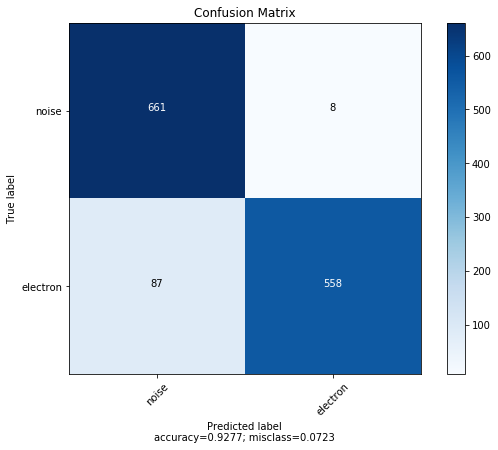

In [23]:
plot_confusion_matrix(cm           = conf1, 
                      normalize    = False,
                      target_names = ['noise', 'electron'],
                      title        = "Confusion Matrix")

### Second model: 60 epochs

Maybe a good solution is to train for more epochs, to see if we can improve the accuracy:

In [24]:
model_n2 = models.Sequential()
model_n2.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_n2.add(layers.MaxPooling2D((2,2)))
model_n2.add(layers.Conv2D(64,(3,3), activation='relu'))
model_n2.add(layers.MaxPooling2D((2,2)))
model_n2.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n2.add(layers.MaxPooling2D((2,2)))
model_n2.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n2.add(layers.MaxPooling2D((2,2)))

model_n2.add(layers.Flatten())
model_n2.add(layers.Dense(units= 2050, activation='softmax'))
model_n2.add(layers.Dense(units= 512, activation='softmax'))
model_n2.add(layers.Dense(units= 1, activation='sigmoid'))
model_n2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 199, 145, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 72, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 14, 128)      

In [25]:
model_n2.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [26]:
historyn2 =model_n2.fit(X_train, y_train, epochs= 60, validation_split = 0.2)

Train on 3153 samples, validate on 789 samples
Epoch 1/60
3153/3153 [==============================] - 87s 28ms/step - loss: 0.6932 - acc: 0.4964 - val_loss: 0.6931 - val_acc: 0.4968
Epoch 2/60
3153/3153 [==============================] - 87s 28ms/step - loss: 0.6931 - acc: 0.5262 - val_loss: 0.6930 - val_acc: 0.4968
Epoch 3/60
3153/3153 [==============================] - 89s 28ms/step - loss: 0.6929 - acc: 0.5059 - val_loss: 0.6928 - val_acc: 0.4968
Epoch 4/60
3153/3153 [==============================] - 82s 26ms/step - loss: 0.6927 - acc: 0.5046 - val_loss: 0.6927 - val_acc: 0.4968
Epoch 5/60
3153/3153 [==============================] - 82s 26ms/step - loss: 0.6926 - acc: 0.5046 - val_loss: 0.6925 - val_acc: 0.4968
Epoch 6/60
3153/3153 [==============================] - 82s 26ms/step - loss: 0.6924 - acc: 0.5046 - val_loss: 0.6924 - val_acc: 0.4968
Epoch 7/60
3153/3153 [==============================] - 82s 26ms/step - loss: 0.6922 - acc: 0.5046 - val_loss: 0.6922 - val_acc: 0.4968
E

In [27]:
model_n2.save('model_electron_or_noise_n2.h5')

In [28]:
loss, acc = model_n2.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

1314/1314 [==============================] - 10s 8ms/step
Accuracy with the model: 94.75%


In [29]:
y_predicted2 = model_n2.predict(X_test)
y_predicted2[np.where(y_predicted2>=0.5)] = 1
y_predicted2[np.where(y_predicted2<0.5)] = 0

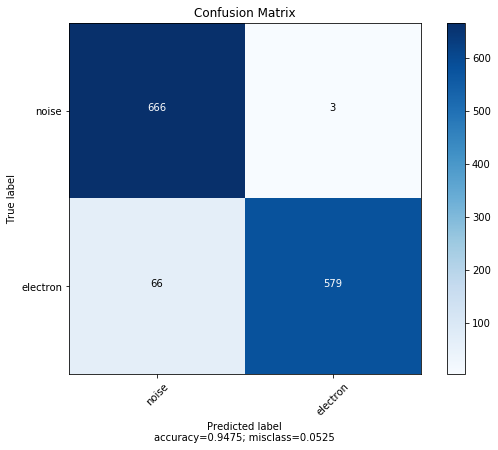

In [30]:
conf2 = confusion_matrix(y_test, y_predicted2, labels = list([0,1]))
plot_confusion_matrix(cm           = conf2, 
                      normalize    = False,
                      target_names = ['noise', 'electron'],
                      title        = "Confusion Matrix")

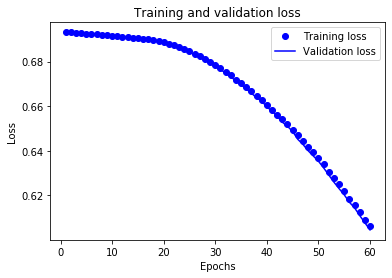

In [31]:
history_n2 = historyn2.history
loss_values_n2 = history_n2['loss']
val_loss_values_n2 = history_n2['val_loss']
epochs_n2 = range(1, len(loss_values_n2) + 1)
plt.plot(epochs_n2, loss_values_n2, 'bo', label='Training loss')
plt.plot(epochs_n2, val_loss_values_n2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Third model: relu activation

In [11]:
model_n3 = models.Sequential()
model_n3.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_n3.add(layers.MaxPooling2D((2,2)))
model_n3.add(layers.Conv2D(64,(3,3), activation='relu'))
model_n3.add(layers.MaxPooling2D((2,2)))
model_n3.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n3.add(layers.MaxPooling2D((2,2)))
model_n3.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n3.add(layers.MaxPooling2D((2,2)))

model_n3.add(layers.Flatten())
model_n3.add(layers.Dense(units= 2050, activation='relu'))
model_n3.add(layers.Dense(units= 512, activation='relu'))
model_n3.add(layers.Dense(units= 1, activation='sigmoid'))
model_n3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 199, 145, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 14, 128)      

In [12]:
model_n3.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [13]:
historyn3 =model_n3.fit(X_train, y_train, epochs= 45, validation_split = 0.2)

Train on 3153 samples, validate on 789 samples
Epoch 1/45
3153/3153 [==============================] - 80s 25ms/step - loss: 0.2114 - acc: 0.9280 - val_loss: 0.1141 - val_acc: 0.9670
Epoch 2/45
3153/3153 [==============================] - 80s 25ms/step - loss: 0.1265 - acc: 0.9607 - val_loss: 0.1319 - val_acc: 0.9632
Epoch 3/45
3153/3153 [==============================] - 76s 24ms/step - loss: 0.1082 - acc: 0.9676 - val_loss: 0.1005 - val_acc: 0.9759
Epoch 4/45
3153/3153 [==============================] - 95s 30ms/step - loss: 0.1041 - acc: 0.9711 - val_loss: 0.1062 - val_acc: 0.9721
Epoch 5/45
3153/3153 [==============================] - 78s 25ms/step - loss: 0.1020 - acc: 0.9724 - val_loss: 0.0938 - val_acc: 0.9747
Epoch 6/45
3153/3153 [==============================] - 78s 25ms/step - loss: 0.0876 - acc: 0.9759 - val_loss: 0.0914 - val_acc: 0.9772
Epoch 7/45
3153/3153 [==============================] - 80s 25ms/step - loss: 0.0917 - acc: 0.9759 - val_loss: 0.1057 - val_acc: 0.9772
E

In [14]:
model_n3.save('model_electron_or_noise_n3.h5')

In [15]:
loss, acc = model_n3.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

1314/1314 [==============================] - 9s 7ms/step
Accuracy with the model: 96.96%


In [16]:
y_predicted3 = model_n3.predict(X_test)
y_predicted3[np.where(y_predicted3>=0.5)] = 1
y_predicted3[np.where(y_predicted3<0.5)] = 0

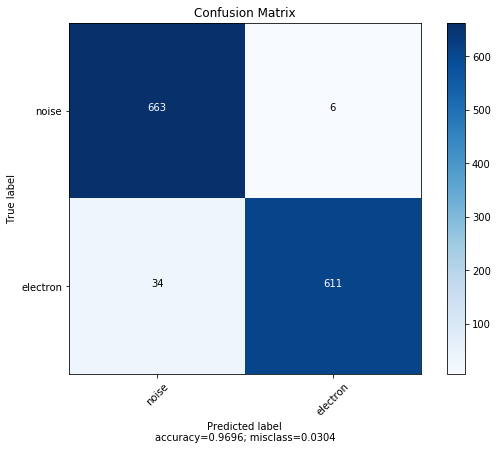

In [26]:
conf3 = confusion_matrix(y_test, y_predicted3, labels = list([0,1]))
plot_confusion_matrix(cm           = conf3, 
                      normalize    = False,
                      target_names = ['noise', 'electron'],
                      title        = "Confusion Matrix")

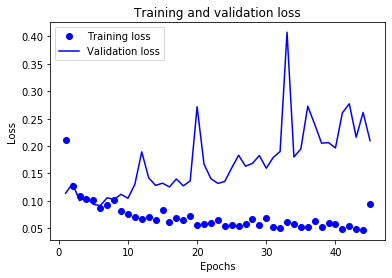

In [27]:
history_n3 = historyn3.history
loss_values_n3 = history_n3['loss']
val_loss_values_n3 = history_n3['val_loss']
epochs_n3 = range(1, len(loss_values_n3) + 1)
plt.plot(epochs_n3, loss_values_n3, 'bo', label='Training loss')
plt.plot(epochs_n3, val_loss_values_n3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Fourth model: relu activation, dropout

In [40]:
model_n4 = models.Sequential()
model_n4.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_n4.add(layers.MaxPooling2D((2,2)))
model_n4.add(layers.Conv2D(64,(3,3), activation='relu'))
model_n4.add(layers.MaxPooling2D((2,2)))
model_n4.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n4.add(layers.MaxPooling2D((2,2)))
model_n4.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n4.add(layers.MaxPooling2D((2,2)))


model_n4.add(layers.Flatten())
model_n4.add(layers.Dropout(0.5))
model_n4.add(layers.Dense(units= 2050, activation='relu'))
model_n4.add(layers.Dense(units= 512, activation='relu'))
model_n4.add(layers.Dense(units= 1, activation='sigmoid'))
model_n4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 199, 145, 32)      320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 99, 72, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 97, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 48, 35, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 16, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 14, 128)      

In [41]:
model_n4.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [42]:
historyn4 =model_n4.fit(X_train, y_train, epochs= 40, validation_split = 0.2)

Train on 3153 samples, validate on 789 samples
Epoch 1/40
3153/3153 [==============================] - 91s 29ms/step - loss: 0.2203 - acc: 0.9194 - val_loss: 0.1312 - val_acc: 0.9556
Epoch 2/40
3153/3153 [==============================] - 91s 29ms/step - loss: 0.1433 - acc: 0.9578 - val_loss: 0.1115 - val_acc: 0.9658
Epoch 3/40
3153/3153 [==============================] - 92s 29ms/step - loss: 0.1250 - acc: 0.9651 - val_loss: 0.1030 - val_acc: 0.9683
Epoch 4/40
3153/3153 [==============================] - 93s 29ms/step - loss: 0.1188 - acc: 0.9664 - val_loss: 0.0994 - val_acc: 0.9721
Epoch 5/40
3153/3153 [==============================] - 91s 29ms/step - loss: 0.1090 - acc: 0.9676 - val_loss: 0.1011 - val_acc: 0.9696
Epoch 6/40
3153/3153 [==============================] - 91s 29ms/step - loss: 0.1076 - acc: 0.9686 - val_loss: 0.0976 - val_acc: 0.9759
Epoch 7/40
3153/3153 [==============================] - 91s 29ms/step - loss: 0.1054 - acc: 0.9737 - val_loss: 0.1048 - val_acc: 0.9747
E

In [43]:
model_n4.save('model_electron_or_noise_n4.h5')

In [44]:
loss, acc = model_n4.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

1314/1314 [==============================] - 10s 8ms/step
Accuracy with the model: 94.90%


In [45]:
y_predicted4 = model_n4.predict(X_test)
y_predicted4[np.where(y_predicted4>=0.5)] = 1
y_predicted4[np.where(y_predicted4<0.5)] = 0

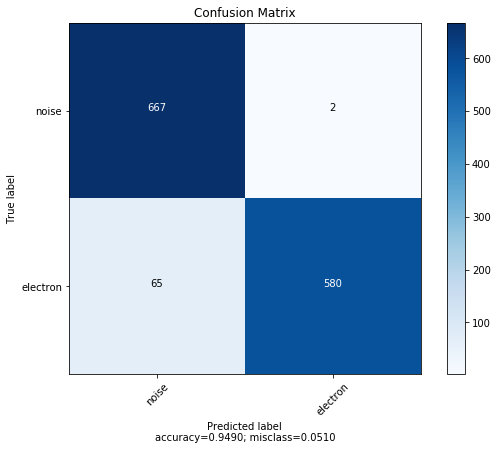

In [46]:
conf4 = confusion_matrix(y_test, y_predicted4, labels = list([0,1]))
plot_confusion_matrix(cm           = conf4, 
                      normalize    = False,
                      target_names = ['noise', 'electron'],
                      title        = "Confusion Matrix")

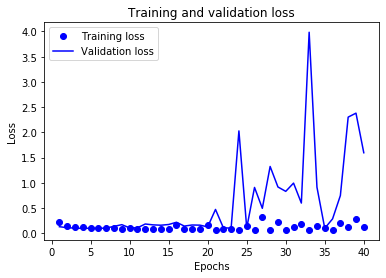

In [47]:
history_n4 = historyn4.history
loss_values_n4 = history_n4['loss']
val_loss_values_n4 = history_n4['val_loss']
epochs_n4 = range(1, len(loss_values_n4) + 1)
plt.plot(epochs_n4, loss_values_n4, 'bo', label='Training loss')
plt.plot(epochs_n4, val_loss_values_n4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Fifth model: one layer less, dropout

In [18]:
model_n5 = models.Sequential()
model_n5.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(window_y, window_x, 1)))
model_n5.add(layers.MaxPooling2D((2,2)))
model_n5.add(layers.Conv2D(64,(3,3), activation='relu'))
model_n5.add(layers.MaxPooling2D((2,2)))
model_n5.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n5.add(layers.MaxPooling2D((2,2)))
model_n5.add(layers.Conv2D(128,(3,3), activation='relu'))
model_n5.add(layers.MaxPooling2D((2,2)))


model_n5.add(layers.Flatten())
model_n5.add(layers.Dropout(0.5))
#model_n4.add(layers.Dense(units= 2050, activation='relu'))
model_n5.add(layers.Dense(units= 512, activation='relu'))
model_n5.add(layers.Dense(units= 1, activation='sigmoid'))
model_n5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 199, 145, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 72, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 14, 128)      

In [19]:
model_n5.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

In [20]:
historyn5 =model_n5.fit(X_train, y_train, epochs= 40, validation_split = 0.2)

Train on 3153 samples, validate on 789 samples
Epoch 1/40
3153/3153 [==============================] - 70s 22ms/step - loss: 0.2526 - acc: 0.9125 - val_loss: 0.1320 - val_acc: 0.9569
Epoch 2/40
3153/3153 [==============================] - 63s 20ms/step - loss: 0.1362 - acc: 0.9562 - val_loss: 0.1111 - val_acc: 0.9683
Epoch 3/40
3153/3153 [==============================] - 66s 21ms/step - loss: 0.1189 - acc: 0.9638 - val_loss: 0.1030 - val_acc: 0.9721
Epoch 4/40
3153/3153 [==============================] - 64s 20ms/step - loss: 0.1168 - acc: 0.9670 - val_loss: 0.0987 - val_acc: 0.9696
Epoch 5/40
3153/3153 [==============================] - 65s 21ms/step - loss: 0.1095 - acc: 0.9689 - val_loss: 0.1024 - val_acc: 0.9708
Epoch 6/40
3153/3153 [==============================] - 64s 20ms/step - loss: 0.1148 - acc: 0.9667 - val_loss: 0.0986 - val_acc: 0.9721
Epoch 7/40
3153/3153 [==============================] - 66s 21ms/step - loss: 0.1137 - acc: 0.9689 - val_loss: 0.0931 - val_acc: 0.9734
E

In [21]:
model_n5.save('model_electron_or_noise_n5.h5')

In [22]:
loss, acc = model_n5.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

1314/1314 [==============================] - 8s 6ms/step
Accuracy with the model: 96.27%


In [23]:
y_predicted5 = model_n5.predict(X_test)
y_predicted5[np.where(y_predicted5>=0.5)] = 1
y_predicted5[np.where(y_predicted5<0.5)] = 0

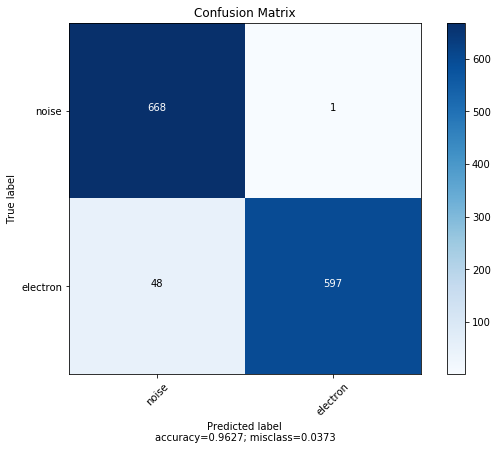

In [28]:
conf5 = confusion_matrix(y_test, y_predicted5, labels = list([0,1]))
plot_confusion_matrix(cm           = conf5, 
                      normalize    = False,
                      target_names = ['noise', 'electron'],
                      title        = "Confusion Matrix")

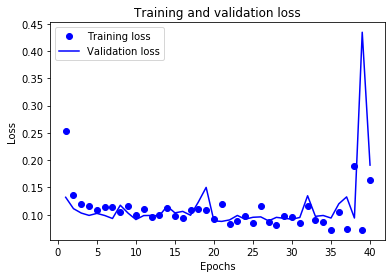

In [29]:
history_n5 = historyn5.history
loss_values_n5 = history_n5['loss']
val_loss_values_n5 = history_n5['val_loss']
epochs_n5 = range(1, len(loss_values_n5) + 1)
plt.plot(epochs_n5, loss_values_n5, 'bo', label='Training loss')
plt.plot(epochs_n5, val_loss_values_n5, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We conclude that the best model for this date is `model_electron_or_noise_n3.h5`